# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


## 1️) Load and Inspect the Dataset

In [3]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Double check some datatypes, and for nulls and duplicates:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [8]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [11]:
conn = sqlite3.connect('../data/superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region','Postal Code']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Region':'region',
    'Postal Code':'postal_code'
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [12]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,8380282.43,973085.86
1,Corporate,5044899.83,660287.69
2,Home Office,2964459.36,434344.01


### What are the top 10 customers by total sales?

In [13]:
query2 = """ SELECT 
c.customer_name,
ROUND(sum(od.sales),2) as Total_Sales 
FROM order_details od
JOIN orders o on od.order_id = o.order_id
JOIN customers c on o.customer_id = c.customer_id
GROUP BY c.customer_id, c.customer_name
ORDER BY Total_Sales DESC LIMIT 10;
"""
result2 = pd.read_sql(query2, conn)
result2

,customer_name,Total_Sales
0,Ken Lonsdale,155927.52
1,Sanjit Engle,134303.82
2,Clay Ludtke,130566.55
3,Adrian Barton,130262.14
4,Sanjit Chand,127281.01
5,Sean Miller,125215.25
6,Edward Hooks,123730.56
7,Greg Tran,118201.20
8,Seth Vernon,114709.50
9,John Lee,107799.15


### Which product categories and subcategories are the most profitable overall?

In [14]:
query3 = """ SELECT
p.category, p.subcategory,
ROUND(SUM(profit), 2) as Most_Profitable
FROM order_details od
JOIN products p  on od.product_id = p.product_id
GROUP BY p.product_id, p.category, p.subcategory
ORDER BY Most_Profitable DESC
"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,Most_Profitable
0,Technology,Copiers,25199.93
1,Technology,Accessories,8850.69
2,Office Supplies,Binders,7753.04
3,Technology,Copiers,6983.88
4,Technology,Copiers,4570.93
...,...,...,...
1857,Furniture,Tables,-1934.40
1858,Furniture,Tables,-2876.12
1859,Technology,Machines,-3839.99
1860,Technology,Machines,-4589.97


### What is the average discount given per category?

In [15]:
query4 = """ SELECT 
category AS Category, ROUND(AVG(discount),2) as Average_Disc
FROM order_details od 
JOIN products p on p.product_id = od.product_id
GROUP BY category
ORDER BY Average_Disc
"""
result4 = pd.read_sql(query4, conn)
result4

,Category,Average_Disc
0,Technology,0.13
1,Office Supplies,0.16
2,Furniture,0.17


### Which states or regions contribute the most to total sales?

In [106]:
query5 = """ SELECT
region, ROUND (SUM(sales),2) AS Total_Sales
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_details od ON o.order_id = od.order_id
GROUP BY region
ORDER BY Total_Sales DESC
"""
result5 = pd.read_sql(query5, conn)
result5

,region,Total_Sales
0,West,5306522.06
1,East,4522990.06
2,Central,3853691.95
3,South,2706437.54


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [17]:
query6 = """SELECT
COUNT(*) AS Late_Orders_Quantity
FROM orders
WHERE (ship_date > order_date + 3)
"""
result6 = pd.read_sql(query6, conn)
result6

,Late_Orders_Quantity
0,5009


### Which month or year had the highest total sales?

In [18]:
query7 = """SELECT
strftime('%m', order_date) as Highest_Sales_By_Month, round(sum(sales),2) as Total_Sales
from orders o
join order_details od on o.order_id=od.order_id
group by Highest_Sales_By_Month
order by Total_Sales desc
limit 1
"""
result7 = pd.read_sql(query7, conn)
result7

,Highest_Sales_By_Month,Total_Sales
0,11,349120.07


### What are the most frequently ordered products?

In [19]:
query8 = """ SELECT
p.product_name as Product_Name, sum(od.quantity) as Ordered_Quantity
from order_details od
join products p on od.product_id = p.product_id
group by od.product_id
order by Ordered_Quantity desc
"""
result8 = pd.read_sql(query8, conn)
result8

,Product_Name,Ordered_Quantity
0,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,150
1,Xerox 1881,140
2,Avery Arch Ring Binders,128
3,Logitech G19 Programmable Gaming Keyboard,120
4,DAX Wood Document Frame,114
...,...,...
1857,Penpower WorldCard Pro Card Scanner,1
1858,Xerox 20,1
1859,Boston 1900 Electric Pencil Sharpener,1
1860,Global Enterprise Series Seating Low-Back Swiv...,1


### Which customers placed more than 5 orders total?

In [20]:
query9 = """select
c.customer_name as Customer_Name, count(o.order_id) as Orders_Per_Customer
from orders o 
join customers c on o.customer_id = c.customer_id
group by c.customer_name, c.customer_id
having Orders_Per_Customer > 5
order by Orders_Per_Customer desc
"""
result9 = pd.read_sql(query9, conn)
result9

,Customer_Name,Orders_Per_Customer
0,Emily Phan,289
1,Erin Ashbrook,169
2,Joel Eaton,169
3,Sally Hughsby,169
4,Zuschuss Carroll,169
...,...,...
742,Shirley Schmidt,9
743,Susan Gilcrest,9
744,Tim Taslimi,9
745,Tony Molinari,9


### What’s the profit margin (profit ÷ sales) by category or segment?

In [39]:
query10 = """select
p.category as Category, round(sum(od.profit/od.sales),2) as Profit_Margin
from order_details od
join products p on od.product_id = p.product_id
group by p.category
Order by Profit_Margin
"""
result10 = pd.read_sql(query10, conn)
result10

,Category,Profit_Margin
0,Furniture,94.71
1,Technology,298.59
2,Office Supplies,867.08


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

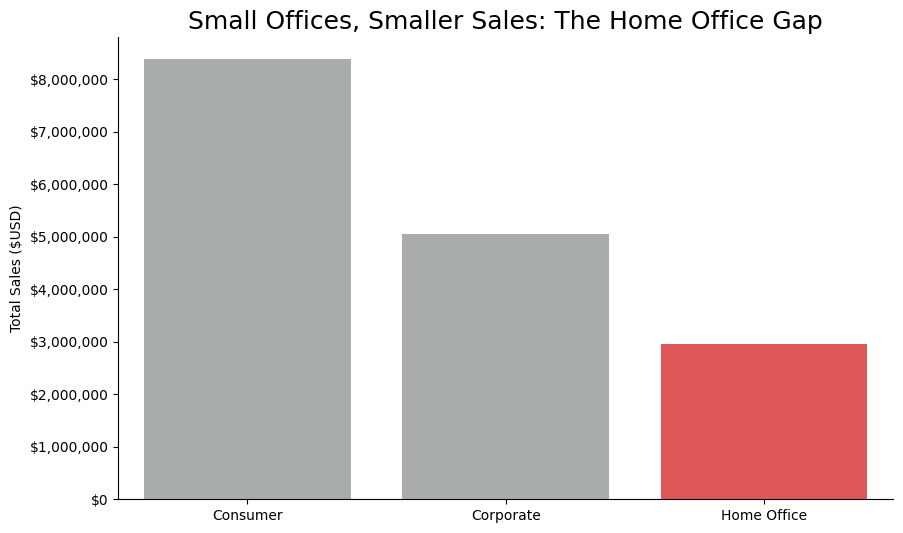

In [22]:
# example using result1

plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


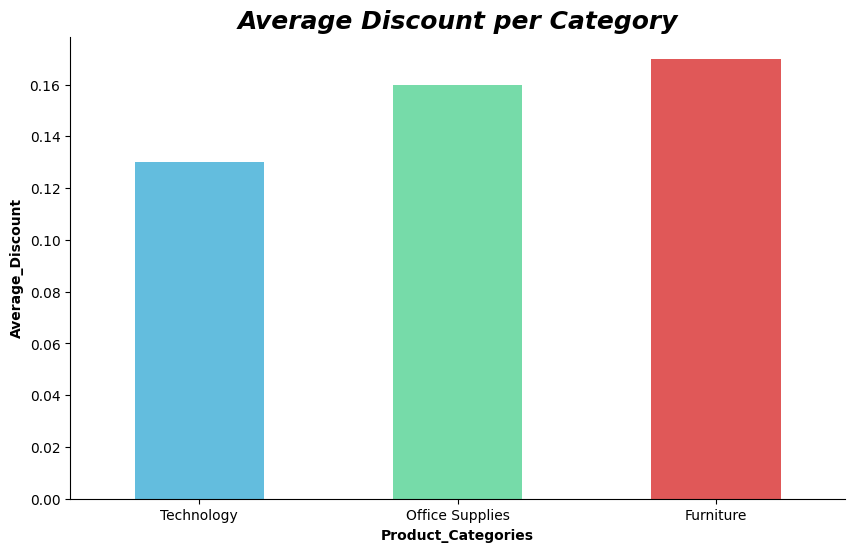

In [116]:
# First visualization Average Discount per Category

plt.figure(figsize=(10,6))
colors = ["#4fc6f2", "#65eca9", "#f74141" ]
sns.barplot(result4, x='Category', y='Average_Disc', palette=colors, hue='Category', legend=False, width=0.5)
plt.title('Average Discount per Category',fontsize=18,fontweight='bold', fontstyle='italic')
plt.xlabel('Product_Categories',fontweight='bold')
plt.ylabel('Average_Discount',fontweight='bold')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')


#using the seaborn library, despining is way easier!
sns.despine()
plt.savefig("../images/Average_Discount_per_Category.png")
plt.show()





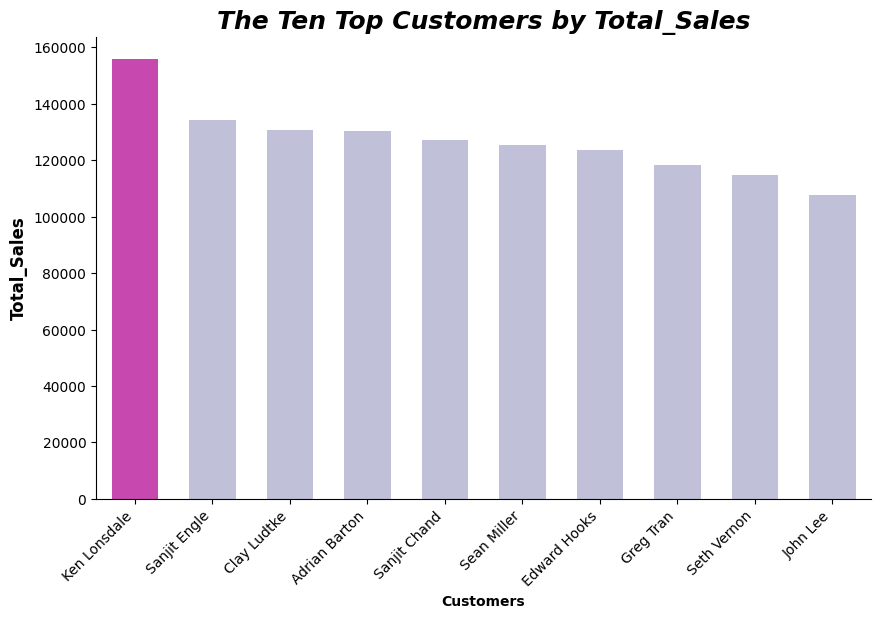

In [118]:
# The Ten Top Customers by Total_Sales

plt.figure(figsize=(10,6))
colors = ["#bcbddc"]
max_index = result2['Total_Sales'].idxmax()
colors = ["#bcbddc" if i != max_index else "#dc34bd" for i in range(len(result2))]


sns.barplot(result2, x='customer_name', y='Total_Sales', palette=colors, hue='customer_name', legend=False, width=0.6)
plt.title('The Ten Top Customers by Total_Sales',fontsize=18, fontweight='bold', fontstyle='italic')
plt.xlabel('Customers',fontsize=10,fontweight='bold')
plt.ylabel('Total_Sales', fontsize=12,fontweight='bold')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')


#using the seaborn library, despining is way easier!
sns.despine()
plt.savefig("../images/The_Ten_TopCustomers_by_TotalSales.png")
plt.show()

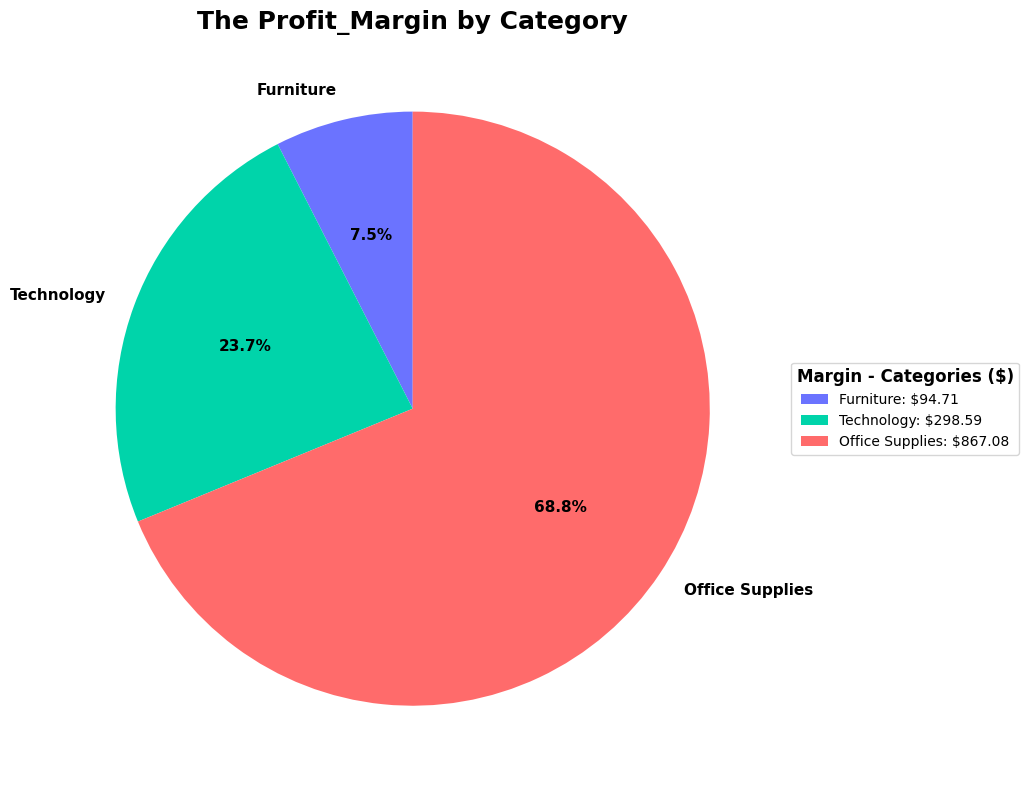

In [119]:
# Profit Margin by Category

plt.figure(figsize=(10, 8))
#colors = ["#49c4e6", "#65eca9", "#ed7aca"]
colors = ["#6B73FF", "#00D4AA", "#FF6B6B"]  # Azul suave, Verde agua, Coral suave



plt.pie(result10['Profit_Margin'], 
        labels=result10['Category'], 
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'})


legend_labels = [f'{cat}: ${margin:,.2f}' for cat, margin in zip(result10['Category'], result10['Profit_Margin'])]
plt.legend (legend_labels,
            title="Margin - Categories ($)",
            loc="center left", 
            bbox_to_anchor=(1, 0, 0.5, 1),
            title_fontproperties={'weight': 'bold', 'size': 12})

plt.title('The Profit_Margin by Category', fontsize=18, fontweight='bold')
sns.despine()
plt.tight_layout()
plt.savefig("../images/The_ProfitMargin_by_Category.png")
plt.show()

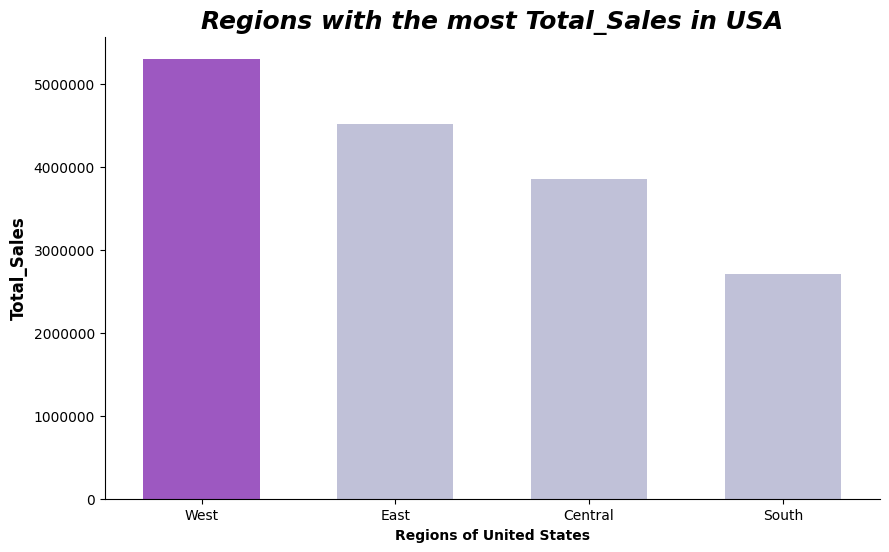

In [123]:
# Regions with the most Total_Sales
plt.figure(figsize=(10,6))
colors = ["#bcbddc"]
max_index = result5['Total_Sales'].idxmax()
colors = ["#bcbddc" if i != max_index else "#a246d3" for i in range(len(result5))]

sns.barplot(result5, x='region', y='Total_Sales', palette=colors, hue='region', legend=False, width=0.6)
plt.title('Regions with the most Total_Sales in USA',fontsize=18, fontweight='bold', fontstyle='italic')
plt.xlabel('Regions of United States',fontsize=10,fontweight='bold')
plt.ylabel('Total_Sales', fontsize=12,fontweight='bold')

plt.ticklabel_format(style='plain', axis='y')

sns.despine()
plt.savefig("../images/Regions_Most_TotalSales.png")
plt.show()
